In [ ]:
import pandas as pd

with open('/content/drive/MyDrive/Colab Notebooks/assign2_wastedata.csv', 'r') as f:
  data = pd.read_csv(f)
  # print(data)
  data.head()


In [ ]:
data.groupby('Building')['Weight'].sum()

Building
Benson Center               1230.18
Facilities                   238.60
Graham                       233.43
Learning Commons              97.50
Malley                       676.54
Swig                         312.85
University Villas            309.50
Vari Hall and Lucas Hall     380.40
Name: Weight, dtype: float64

In [ ]:
data.groupby(['Building','Stream'])['Weight'].sum()

Building                  Stream                 
Benson Center             Compost                     14.60
                          Compost in Landfill        616.00
                          Compost in Recycling         6.00
                          Landfill                    81.71
                          Landfill in Compost          0.01
                          Landfill in Recycling        4.01
                          Recycling                  161.80
                          Recycling in Compost         1.42
                          Recycling in Landfill      313.23
                          Reusables in Compost         0.80
                          Reusables in Landfill       21.90
                          Reusables in Recycling       8.70
Facilities                Compost                     36.60
                          Compost in Landfill         37.70
                          Compost in Recycling         5.80
                          Landfill                

In [ ]:
data['Correctly classified'] = data['Stream'].apply(lambda x: 1 if x in ['Landfill', 'Compost', 'Recycling'] else 0)

In [ ]:
data['Correctly classified'] = data['Stream'].apply(lambda x: 1 if x in ['Landfill', 'Compost', 'Recycling', 'Food Waste in Compost', 'Reusables in Recycling'] else 0)


In [ ]:

data['Correctly classified'] = data['Stream'].apply(lambda x: 'Yes' if x in ['Landfill', 'Compost', 'Recycling', 'Food Waste in Compost', 'Reusables in Recycling'] else 'No')
data.head()
data = data.drop(columns=['Notes', 'Date'])
print(data)


       Building                 Stream       Substream  Volume  Weight  \
0    Facilities              Recycling           Paper    1.00    15.8   
1    Facilities              Recycling       Cardboard    1.00     5.5   
2    Facilities              Recycling       Cardboard    1.00     8.6   
3    Facilities              Recycling           Paper    0.66     6.5   
4    Facilities  Landfill in Recycling  Other Landfill    0.10     1.2   
..          ...                    ...             ...     ...     ...   
516        Swig  Recycling in Landfill   Plastics #1-7    1.00     6.4   
517        Swig  Recycling in Landfill   Plastics #1-7    1.00     4.9   
518        Swig  Reusables in Landfill       Reusables    0.25     4.9   
519        Swig               Landfill       Styrofoam    0.00     0.0   
520        Swig  Recycling in Landfill      Terracycle    0.00     0.0   

    Correctly classified  
0                    Yes  
1                    Yes  
2                    Yes  
3  

In [ ]:
data['Appropriate Bin'] = data['Stream'].apply(lambda x: x.split(' in ')[0] if ' in ' in x else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Compost' if x == 'Food waste' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Landfill' if x == 'Landfill' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Recycling' if x == 'Recycling' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Compost' if x == 'Food Waste' else x)
data['Appropriate Bin'] = data['Appropriate Bin'].apply(lambda x: 'Recycling' if x == 'Reusables' else x)
data.head()


,Building,Stream,Substream,Volume,Weight,Correctly classified,Appropriate Bin
0,Facilities,Recycling,Paper,1.00,15.8,Yes,Recycling
1,Facilities,Recycling,Cardboard,1.00,5.5,Yes,Recycling
2,Facilities,Recycling,Cardboard,1.00,8.6,Yes,Recycling
3,Facilities,Recycling,Paper,0.66,6.5,Yes,Recycling
4,Facilities,Landfill in Recycling,Other Landfill,0.10,1.2,No,Landfill


In [ ]:

correctly_classified_waste = data[data['Correctly classified'] == 'Yes'].shape[0]
total_waste = data.shape[0]
percentage_correctly_classified = correctly_classified_waste / total_waste * 100

# Calculate the percentage of wrongly classified waste
wrongly_classified_waste = data[data['Correctly classified'] == 'No'].shape[0]
percentage_wrongly_classified = wrongly_classified_waste / total_waste * 100

# Print the results
print("Percentage of correctly classified waste:", percentage_correctly_classified)
print("Percentage of wrongly classified waste:", percentage_wrongly_classified)


Percentage of correctly classified waste: 25.5278310940499
Percentage of wrongly classified waste: 74.4721689059501


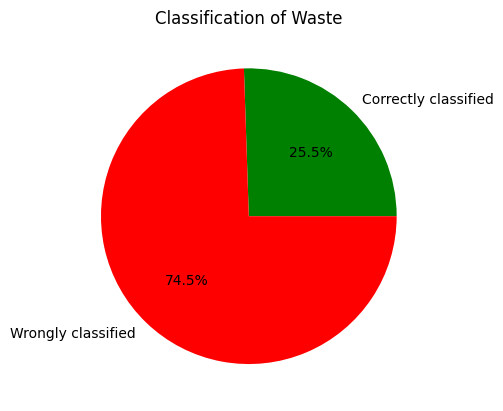

In [ ]:

import matplotlib.pyplot as plt

labels = ['Correctly classified', 'Wrongly classified']
sizes = [percentage_correctly_classified, percentage_wrongly_classified]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Classification of Waste')
plt.show()


In [ ]:

data['Current Bin'] = data.apply(lambda row: row['Stream'].split(' in ')[1] if row['Correctly classified'] == 'No' else row['Appropriate Bin'], axis=1)
data.head()


,Building,Stream,Substream,Volume,Weight,Correctly classified,Appropriate Bin,Current Bin
0,Facilities,Recycling,Paper,1.00,15.8,Yes,Recycling,Recycling
1,Facilities,Recycling,Cardboard,1.00,5.5,Yes,Recycling,Recycling
2,Facilities,Recycling,Cardboard,1.00,8.6,Yes,Recycling,Recycling
3,Facilities,Recycling,Paper,0.66,6.5,Yes,Recycling,Recycling
4,Facilities,Landfill in Recycling,Other Landfill,0.10,1.2,No,Landfill,Recycling


In [ ]:
data.groupby(['Appropriate Bin','Correctly classified'])['Weight'].sum().unstack(fill_value=0)

Correctly classified,No,Yes
Appropriate Bin,,
Compost,1411.50,128.10
Landfill,37.92,341.93
Recycling,1007.95,551.60


In [ ]:
correctly_classified_by_category = (
    data[data['Correctly classified'] == 'Yes']
    .groupby('Appropriate Bin')['Weight']
    .sum()
)
wrongly_classified_by_category = (
    data[data['Correctly classified'] == 'No']
    .groupby('Appropriate Bin')['Weight']
    .sum()
)
print("Weight of correctly classified trash by category:")
print(correctly_classified_by_category, wrongly_classified_by_category)

p1_Compost = 100 * (correctly_classified_by_category[0]/ (correctly_classified_by_category[0] + wrongly_classified_by_category[0]))
p1_Landfill = 100 * (correctly_classified_by_category[1]/ (correctly_classified_by_category[1] + wrongly_classified_by_category[1]))
p1_Recycling = 100 * (correctly_classified_by_category[2]/ (correctly_classified_by_category[2] + wrongly_classified_by_category[2]))


print(p1_Compost, 100 - p1_Compost)
print(p1_Landfill, 100 - p1_Landfill)
print(p1_Recycling, 100 - p1_Recycling)

Weight of correctly classified trash by category:
Appropriate Bin
Compost      128.10
Landfill     341.93
Recycling    551.60
Name: Weight, dtype: float64 Appropriate Bin
Compost      1411.50
Landfill       37.92
Recycling    1007.95
Name: Weight, dtype: float64
8.320342946219798 91.6796570537802
90.0171120179018 9.982887982098205
35.36917700618768 64.63082299381233


In [ ]:
correctly_classified_by_building = (
    data.groupby('Building')['Correctly classified']
    .apply(lambda x: (x == 'Yes').sum() / x.shape[0] * 100)
)

# Group the data by building and calculate the percentage of wrongly classified waste for each building
wrongly_classified_by_building = (
    data.groupby('Building')['Correctly classified']
    .apply(lambda x: (x == 'No').sum() / x.shape[0] * 100)
)

# Print the results
print("Percentage of correctly classified waste by building:")
print(correctly_classified_by_building)

print("\nPercentage of wrongly classified waste by building:")
print(wrongly_classified_by_building)


Percentage of correctly classified waste by building:
Building
Benson Center               21.582734
Facilities                  35.714286
Graham                       9.756098
Learning Commons            45.454545
Malley                      36.296296
Swig                        15.555556
University Villas            9.523810
Vari Hall and Lucas Hall    20.454545
Name: Correctly classified, dtype: float64

Percentage of wrongly classified waste by building:
Building
Benson Center               78.417266
Facilities                  64.285714
Graham                      90.243902
Learning Commons            54.545455
Malley                      63.703704
Swig                        84.444444
University Villas           90.476190
Vari Hall and Lucas Hall    79.545455
Name: Correctly classified, dtype: float64


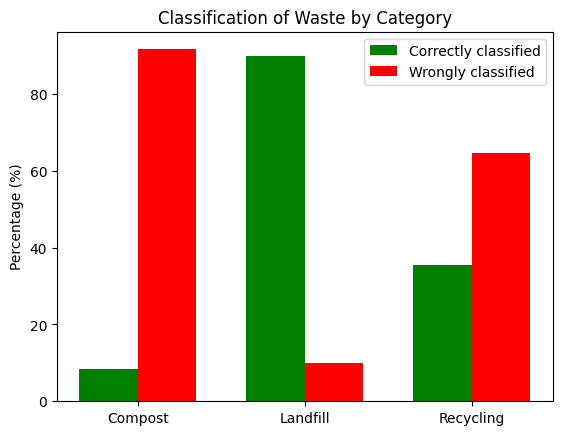

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
labels = ['Compost', 'Landfill', 'Recycling']
correct_percentages = [p1_Compost, p1_Landfill, p1_Recycling]
wrong_percentages = [100 - p1_Compost, 100 - p1_Landfill, 100 - p1_Recycling]

x = np.arange(len(labels))  # Positions of the bars
width = 0.35  # Width of bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, correct_percentages, width, label='Correctly classified', color='green')
rects2 = ax.bar(x + width/2, wrong_percentages, width, label='Wrongly classified', color='red')

# Add labels, title, and legend
ax.set_ylabel('Percentage (%)')
ax.set_title('Classification of Waste by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


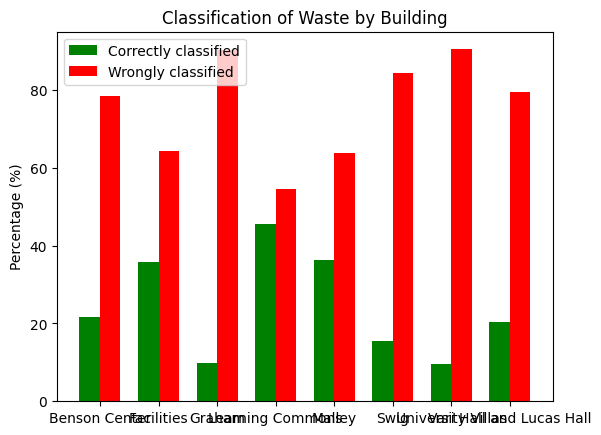

In [ ]:
import numpy as np

x = np.arange(len(correctly_classified_by_building))  # Positions of the bars
width = 0.35  # Width of bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, correctly_classified_by_building, width, label='Correctly classified', color='green')
rects2 = ax.bar(x + width/2, wrongly_classified_by_building, width, label='Wrongly classified', color='red')

ax.set_ylabel('Percentage (%)')
ax.set_title('Classification of Waste by Building')
ax.set_xticks(x)
ax.set_xticklabels(correctly_classified_by_building.index.tolist())
ax.legend()

plt.show()


In [ ]:
data.to_csv('waste_data_analysis_2.csv', index=False)

In [ ]:
data.groupby('Appropriate Bin')['Substream'].apply(lambda x: x.value_counts())

Appropriate Bin                                       
Compost          Compostable Food Containers              42
                 Misc. Meal Waste                         39
                 Paper Towels                             22
                 paper towels                             16
                 Compostable Dining Waste (non-edible)     3
                 Food Waste (edible)                       3
                 SCU Coffee Cups                           2
                 BPI Certified Compostable To-Go Ware      1
                 Food/Organic Waste                        1
                 Napkins/Paper Towels                      1
Landfill         Other Landfill                           46
                 Styrofoam                                 8
                 Misc. Landfill                            3
                 Non-SCU Coffee Cups                       2
                 Reusables                                 1
                 styrofoam    